In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'year': [
        2010, 2011, 2012,
        2010, 2011, 2012,
        2010, 2011, 2012
    ],
    'team': [
        'FCBarcelona', 'FCBarcelona',
        'FCBarcelona', 'RMadrid',
        'RMadrid', 'Rmadrid',
        'ValenciaCF', 'ValenciaCF',
        'ValenciaCF'
    ],
    'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
    'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8],
    'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
}

football = pd.DataFrame(data, columns = [
    'year', 'team', 'wins', 'draws', 'losses'
    ]
)

In [3]:
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,Rmadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In [4]:
# na_values = ':' is useful here as it turns ':' into NaN which is a null value
# isnull() can check which index has null value
edu = pd.read_csv('data/educ_figdp_1_Data.csv', na_values = ':', usecols = ['TIME', 'GEO', 'Value'])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [5]:
edu.columns

Index(['TIME', 'GEO', 'Value'], dtype='object')

In [6]:
edu.index

RangeIndex(start=0, stop=384, step=1)

In [7]:
edu.describe() #The result shows the count, the mean, the sd, the MIN and MAX, and the percentiles

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [8]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [9]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [10]:
edu.loc[90:94, ['TIME', "GEO"]]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [11]:
edu['Value'] > 6.5 # produces a Boolean mask with True or False for each row

0      False
1      False
2      False
3      False
4      False
       ...  
379    False
380    False
381     True
382     True
383     True
Name: Value, Length: 384, dtype: bool

In [12]:
edu[edu['Value'] > 6.5].head() # filtered DataFrame containing only rows with values higher than 6.5

,TIME,GEO,Value
93,2009,Belgium,6.57
94,2010,Belgium,6.58
95,2011,Belgium,6.55
120,2000,Denmark,8.28
121,2001,Denmark,8.44


In [13]:
edu['Value'].count()

361

In [14]:
edu[edu['Value'].isnull()]

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN
49,2001,Euro area (17 countries),NaN
60,2000,Euro area (15 countries),NaN
72,2000,Euro area (13 countries),NaN
84,2000,Belgium,NaN
174,2006,Greece,NaN


In [15]:
edu.max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

<img src='./axis.png'>

reference: https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean

In [16]:
print("Pandas max function:", edu['Value'].max())
print("Python max function:", max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Using function from Numpy
======

In [17]:
s = edu['Value'].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [18]:
s = edu['Value'].apply(lambda x: x**2) # 'x' can be other characters
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Add a new column to a DataFrame
==

In [19]:
print(edu['Value'].max())

8.81


In [20]:
edu['ValueNorm'] = edu['Value']/edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Remove a cloumn from a DataFrame
==

In [21]:
# Drop function returns a copy of the modified data, instead of overwriting the DataFrame. 
# Therefore, the original DataFrame is kept.
# [inplace = True] removes the values from the DataFrame
edu.drop('ValueNorm', axis = 1, inplace = True) 
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Add a new row at the bottom of the DataFrame
==

In [22]:
df1 = pd.DataFrame( # Create a new DataFrame object
    [[2000, 'a', 5.0]], #no matter how many new rows are there, always start with a list:[]
    columns=['TIME', 'GEO', 'Value'],
)

edu = pd.concat([edu, df1], ignore_index = True) # There are differences between [df1, edu] and [edu, df1].
print(edu)

     TIME                            GEO  Value
0    2000  European Union (28 countries)    NaN
1    2001  European Union (28 countries)    NaN
2    2002  European Union (28 countries)   5.00
3    2003  European Union (28 countries)   5.03
4    2004  European Union (28 countries)   4.95
..    ...                            ...    ...
380  2008                        Finland   6.10
381  2009                        Finland   6.81
382  2010                        Finland   6.85
383  2011                        Finland   6.76
384  2000                              a   5.00

[385 rows x 3 columns]


In [23]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Dropping All Rows with Missing Value or NA, NaN, etc.
==

In [24]:
# set how keyword to 'any' or 'all'
# Restrict dropna function to a subset of columns
eduDrop = edu.dropna(how = 'any', subset = ['Value'])

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [25]:
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


Filling the Missing Value or NA, NaN, etc. with another value
==

In [26]:
eduFilled = edu.fillna(value = {"Value": 0})

In [27]:
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

Sorting by descending order
==

In [28]:
edu.sort_values(by = 'Value', ascending = False,
               inplace = True)

In [29]:
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Return to original order
==

In [30]:
edu.sort_index(axis = 0, ascending = True, inplace = True)

In [31]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Grouping Data
==

In [32]:
# The value returned by groupby function is a special grouped DataFrame
group = edu[["GEO", "Value"]].groupby('GEO').mean()

In [33]:
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Rearranging Data
==

In [34]:
filtered_data = edu[edu["TIME"] > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
                       index = ['GEO'],
                       columns = ['TIME'])

In [35]:
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [36]:
pivedu.loc[['Spain','Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

Ranking Data
==

In [37]:
pivedu = pivedu.drop([
            'Euro area (13 countries)',
            'Euro area (15 countries)',
            'Euro area (17 countries)',
            'Euro area (18 countries)',
            'European Union (25 countries)',
            'European Union (27 countries)',
            'European Union (28 countries)'    
        ], axis = 0)

In [38]:
pivedu = pivedu.rename(index = {'Germany (until 1990 former territory of the FRG)': 'Germany'})

In [39]:
pivedu = pivedu.dropna()

In [53]:
# ranks are assigned in the order they appear in the array
# astype(int) set the value type into integer
pivedu.rank(ascending = False, method = 'first').astype(int).head() 

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10,7,11,7,8,8
Belgium,5,4,3,4,5,5
Bulgaria,21,21,20,20,22,22
Cyprus,2,2,2,2,2,3
Czech Republic,19,20,21,21,20,19


In [52]:
print(edu[edu['GEO'] == 'Denmark'])

     TIME      GEO  Value
120  2000  Denmark   8.28
121  2001  Denmark   8.44
122  2002  Denmark   8.44
123  2003  Denmark   8.33
124  2004  Denmark   8.43
125  2005  Denmark   8.30
126  2006  Denmark   7.97
127  2007  Denmark   7.81
128  2008  Denmark   7.68
129  2009  Denmark   8.74
130  2010  Denmark   8.81
131  2011  Denmark   8.75


In [54]:
totalSum = pivedu.sum(axis = 1)
totalSum.rank(ascending = False, method = 'dense').sort_values().head().astype(int)

GEO
Denmark    1
Cyprus     2
Finland    3
Malta      4
Belgium    5
dtype: int64

In [44]:
print(totalSum)

GEO
Austria           33.89
Belgium           38.11
Bulgaria          24.86
Cyprus            45.19
Czech Republic    25.51
Denmark           49.76
Estonia           31.88
Finland           38.60
France            34.29
Germany           28.61
Hungary           30.56
Ireland           34.31
Italy             26.99
Latvia            31.42
Lithuania         30.51
Malta             38.37
Netherlands       34.18
Poland            30.44
Portugal          31.74
Slovakia          23.40
Slovenia          33.12
Spain             28.04
dtype: float64


<AxesSubplot:title={'center':'Total Education Expenditure for Country'}, xlabel='GEO'>

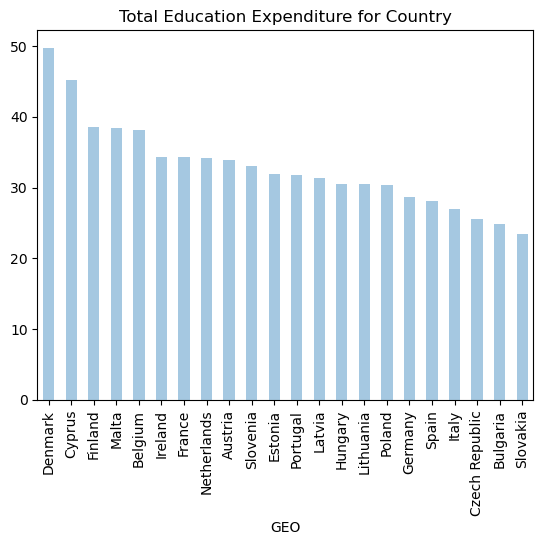

In [55]:
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = 'bar', style = 'b', alpha = 0.4, title = 'Total Education Expenditure for Country')

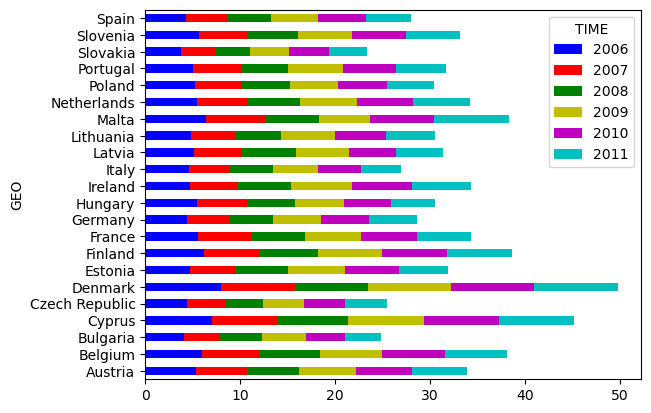

In [63]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind = 'barh', stacked = True, color = my_colors)